In [1]:
import numpy as np
import pandas as pd
from ml.linear_models import LinearRegression, KernelRidgeRegression
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Linear Regression with feature maps

In [2]:
# Maps the vector x to a polynomial feature space of degree k. (e.g. 1 + x + x^2 when k=2)
def polynomial_features(x, degree):
    features = []
    for x_i in x:
        feature = []
        for j in range(degree):
            feature.append(x_i[0]**j)
        features.append(feature)
    return np.array(features)

# Maps the vector x to a sin feature space of degree k. (e.g. sin(1*pi*x) + sin(2*pi*x) when k=2)
def sine_features(x, degree):
    features = []
    for x_i in x:
        feature = []
        for j in range(degree):
            feature.append(np.sin((j+1)*np.pi*x_i[0]))
        features.append(feature)
    return np.array(features)

# Calculates mean squarred error
def mean_squarred_error(y, y_pred):
    return np.mean((y - y_pred.reshape(y.shape))**2)

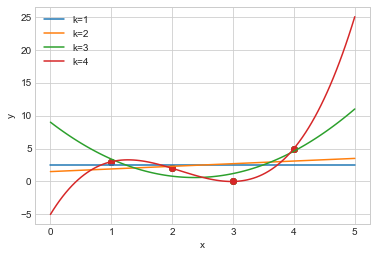

In [3]:
# Generate data
x = np.array([1,2,3,4]).reshape(-1, 1)
y = np.array([3,2,0,5])

# Define linear regressors (each will have different k value)
regressors = [LinearRegression() for i in range(4)]

# Generate span of x points used for visualization
x_space = np.linspace(0, 5, 100)
y_preds = []
# fig, ax = plt.subplots(1, 1, figsize=(12, 10))
fig, ax = plt.subplots(1, 1)

for i, regressor in enumerate(regressors):
    # Map training data to feature space and fit model
    xi  = polynomial_features(x, i+1)
    regressor.fit(xi, y)
    y_preds.append(regressor.predict(xi))
    # Map visualization data and predict
    feature_space = polynomial_features(x_space.reshape(-1, 1), i+1)
    y_pred = regressor.predict(feature_space)
    # Plot
    ax.scatter(x, y)
    ax.plot(x_space, y_pred, label=f'k={i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

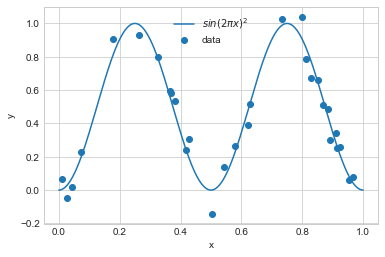

In [4]:
# Generate data
x = np.random.uniform(size=30).reshape(-1, 1)
y = np.sin(2*np.pi*x)**2 +  np.random.normal(loc=0, scale=0.07, size=x.shape[0]).reshape(-1, 1)
# Plot data
x2 = np.linspace(0, 1, 300)
plt.plot(x2, np.sin(2*np.pi*x2)**2, label='$sin(2\pi x)^2$')
plt.scatter(x, y, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Polynomial features

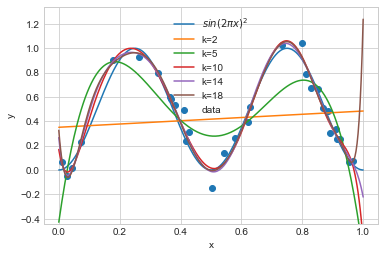

In [5]:
# Define degrees to loop through and regressors
degrees = [2, 5, 10, 14, 18] 
regressors = [LinearRegression() for k in degrees]

# Plot data and $sin(2\pi x)^2$
x_test = np.linspace(0, 1, 300).reshape(-1, 1)
plt.plot(x_test, np.sin(2*np.pi*x_test)**2, label='$sin(2\pi x)^2$')
plt.scatter(x, y, label='data')
plt.legend()
# Fit regressors
for regressor, k in zip(regressors, degrees):
    # Fit regressor
    features = polynomial_features(x, k)
    regressor.fit(features, y)
    # Create predictions
    features_test = polynomial_features(x_test, k)
    y_pred = regressor.predict(features_test)
    # Plot results for regressor k
    plt.plot(x2, y_pred, label=f'k={k}')
    plt.ylim([np.min(y)-0.3, np.max(y)+0.3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

In [6]:
# Get MSE results over 100 runs for 18 models
all_train_mse = []
all_test_mse = []
while len(all_train_mse) < 100:
    # Generate train/test sets
    x = np.random.uniform(size=30).reshape(-1, 1)
    y = (np.sin(2*np.pi*x)**2 
       + np.random.normal(loc=0, scale=0.07, size=x.shape[0]).reshape(-1, 1))
    x_test = np.random.uniform(size=1000).reshape(-1, 1)
    y_test = (np.sin(2*np.pi*x_test)**2 
            + np.random.normal(loc=0, scale=0.07, size=x_test.shape[0]).reshape(-1, 1))
    # Fit all 18 models
    train_mse = []
    test_mse = []
    singular_matrix = False
    for k in range(1, 19):
        regressor = LinearRegression()
        features = polynomial_features(x, k)
        # Fits the regressor and  handles case of singular matrix
        if not regressor.fit(features, y):
            singular_matrix = True
            break
        # Get and store results
        y_pred_train = regressor.predict(features)
        train_mse.append(mean_squarred_error(y, y_pred_train))
        features_test = polynomial_features(x_test, k)
        y_pred_test = regressor.predict(features_test)
        test_mse.append(mean_squarred_error(y_test, y_pred_test))
        # Ignore all k's for this run if singular matrix
    if not singular_matrix:
        all_train_mse.append(train_mse)
        all_test_mse.append(test_mse)

(100, 18)


Text(0, 0.5, 'train log(avgMSE)')

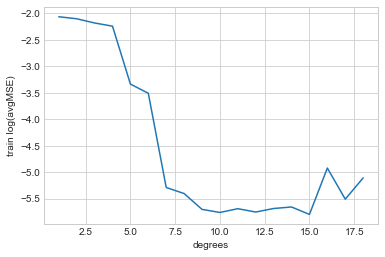

In [7]:
# Plot train log(avgMSE)
print(np.array(all_train_mse).shape)
plt.plot(range(1, 19), np.log(np.mean(all_train_mse, axis=0)))
plt.xlabel('degrees')
plt.ylabel('train log(avgMSE)')

(100, 18)


Text(0, 0.5, 'test log(avgMSE)')

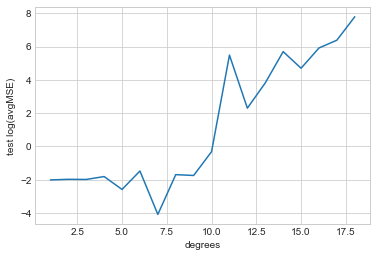

In [8]:
# Plot test log(avgMSE)
print(np.array(all_train_mse).shape)
plt.plot(range(1, 19), np.log(np.mean(all_test_mse, axis=0)))
plt.xlabel('degrees')
plt.ylabel('test log(avgMSE)')

## Sine features

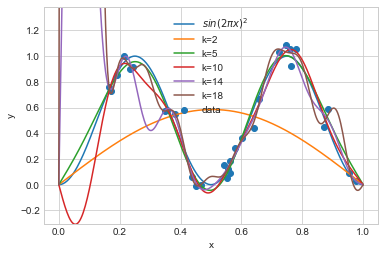

In [9]:
# Define degrees to loop through and regressors
degrees = [2, 5, 10, 14, 18] 
regressors = [LinearRegression() for k in degrees]

# Plot data and $sin(2\pi x)^2$
x_test = np.linspace(0, 1, 300).reshape(-1, 1)
plt.plot(x_test, np.sin(2*np.pi*x_test)**2, label='$sin(2\pi x)^2$')
plt.scatter(x, y, label='data')
plt.legend()
# Fit regressors
for regressor, k in zip(regressors, degrees):
    # Fit regressor
    features = sine_features(x, k)
    regressor.fit(features, y)
    # Create predictions
    features_test = sine_features(x_test, k)
    y_pred = regressor.predict(features_test)
    # Plot results for regressor k
    plt.plot(x2, y_pred, label=f'k={k}')
    plt.ylim([np.min(y)-0.3, np.max(y)+0.3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

In [10]:
# Get MSE results over 100 runs for 18 models
all_train_mse = []
all_test_mse = []
while len(all_train_mse) < 100:
    # Generate train/test sets
    x = np.random.uniform(size=30).reshape(-1, 1)
    y = (np.sin(2*np.pi*x)**2 
       + np.random.normal(loc=0, scale=0.07, size=x.shape[0]).reshape(-1, 1))
    x_test = np.random.uniform(size=1000).reshape(-1, 1)
    y_test = (np.sin(2*np.pi*x_test)**2 
            + np.random.normal(loc=0, scale=0.07, size=x_test.shape[0]).reshape(-1, 1))
    # Fit all 18 models
    train_mse = []
    test_mse = []
    singular_matrix = False
    for k in range(1, 19):
        regressor = LinearRegression()
        features = sine_features(x, k)
        # Fits the regressor and  handles case of singular matrix
        if not regressor.fit(features, y):
            singular_matrix = True
            break
        # Get and store results
        y_pred_train = regressor.predict(features)
        train_mse.append(mean_squarred_error(y, y_pred_train))
        features_test = sine_features(x_test, k)
        y_pred_test = regressor.predict(features_test)
        test_mse.append(mean_squarred_error(y_test, y_pred_test))
        # Ignore all k's for this run if singular matrix
    if not singular_matrix:
        all_train_mse.append(train_mse)
        all_test_mse.append(test_mse)

(100, 18)


Text(0, 0.5, 'train log(avgMSE)')

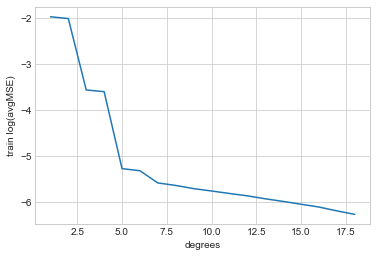

In [11]:
# Plot train log(avgMSE)
print(np.array(all_train_mse).shape)
plt.plot(range(1, 19), np.log(np.mean(all_train_mse, axis=0)))
plt.xlabel('degrees')
plt.ylabel('train log(avgMSE)')

(100, 18)


Text(0, 0.5, 'test log(avgMSE)')

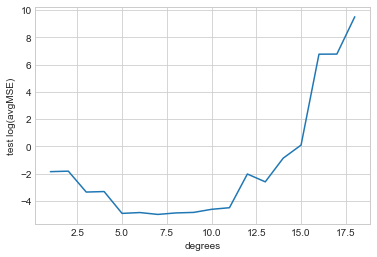

In [12]:
# Plot test log(avgMSE)
print(np.array(all_train_mse).shape)
plt.plot(range(1, 19), np.log(np.mean(all_test_mse, axis=0)))
plt.xlabel('degrees')
plt.ylabel('test log(avgMSE)')

# Kernel Ridge Regression

In [13]:
df = pd.read_csv('./data/boston/boston_filtered.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [14]:
# Splits data into train and test x, y with test_size specified between (0, 1)
def train_test_split(x, y, test_size):
    data = []
    for x_i, y_i in zip(x, y):
        data.append([x_i, y_i])
    np.random.shuffle(data)
    m = len(data)
    test_samples = round(m * test_size)
    train_data = data[:-test_samples]
    test_data = data[-test_samples:]
    x_train = np.array([sample[0] for sample in train_data])
    y_train = np.array([sample[1] for sample in train_data])
    x_test = np.array([sample[0] for sample in test_data])
    y_test = np.array([sample[1] for sample in test_data])
    return x_train, x_test, y_train, y_test

# Returns train and test datasets after folds
def train_test_folds(data, test_fold, k):
    fold_range = data.shape[0] // k
    train_data = data[:test_fold*fold_range]
    if test_fold == k-1:
        test_data = data[test_fold*fold_range:]
    else:
        test_data = data[test_fold*fold_range:(test_fold+1)*fold_range]
        train_data = np.append(train_data, data[(test_fold+1)*fold_range:], axis=0)
    return train_data, test_data

In [15]:
# Create parameters for grid search
gamma_vec = [2**x for x in range(-40, -25)]
sigma_vec = [2**x for x in np.arange(7, 13.5, .5)]

# Create object to capture results of search
cross_val_results = {
    'train_mse': [],
    'val_mse': [],
    'gamma': [],
    'sigma': [],
}

# Grid search
data = df.values
np.random.shuffle(data)
train_data = data[:-data.shape[0]//3]
test_data = data[-data.shape[0]//3:]
k = 5
for gamma in gamma_vec:
    for sigma in sigma_vec:
        # Itterate over folds
        train_mse = []
        val_mse = []
        for test_fold in range(k):
            # Split fold into train and test
            train_data_folds, val_data_fold= train_test_folds(train_data, test_fold, k)
            x_train, y_train = train_data_folds[:, :-1], train_data_folds[:, -1]
            x_val, y_val = val_data_fold[:, :-1], val_data_fold[:, -1]
            # Run ridge regression
            regressor = KernelRidgeRegression(gamma=gamma, 
                                              kernel='rbf', 
                                              kernel_params={'sigma': sigma})
            regressor.fit(x_train, y_train)
            y_pred = regressor.predict(x_train)
            train_mse.append(mean_squarred_error(y_pred, y_train))
            y_pred = regressor.predict(x_val)
            val_mse.append(mean_squarred_error(y_pred, y_val))
        # Save model parameters and mse results
        cross_val_results['train_mse'].append(np.mean(train_mse))
        cross_val_results['val_mse'].append(np.mean(val_mse))
        cross_val_results['gamma'].append(gamma)
        cross_val_results['sigma'].append(sigma)

cross_val_results_df = pd.DataFrame(cross_val_results)

Text(0.5, 0, 'log(MSE)')

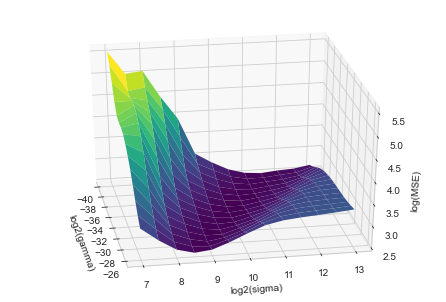

In [16]:
# Create 3d plot of cross-validation error against gamma and sigma
from mpl_toolkits.mplot3d import Axes3D

z = np.zeros((len(sigma_vec), len(gamma_vec)))
for i, sigma in enumerate(sigma_vec):
    for j, gamma in enumerate(gamma_vec):
        z[i, j] = cross_val_results_df[(cross_val_results_df['sigma']==sigma)
                                       & (cross_val_results_df['gamma']==gamma)]['val_mse'].values[0]
        
x, y = np.meshgrid(gamma_vec, sigma_vec)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(np.log2(x), np.log2(y), np.log(z), cmap='viridis')
ax.view_init(azim=-10)
ax.set_xlabel('log2(gamma)')
ax.set_ylabel('log2(sigma)')
ax.set_zlabel('log(MSE)')

# Compare models

In [17]:
results = {
    'Method': [],
    'MSE train': [],
    'MSE train std': [],
    'MSE test': [],
    'MSE test std': [],
}

x = df.drop(['MEDV'], axis=1).values
y = df['MEDV'].values

####################
# Naive Regression #
####################
train_mse = []
test_mse = []
for i in range(20):
    # Transform and split data
    x_transformed = np.ones((x.shape[0], 1))
    x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.33)
    # Fit regression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    # Compute train loss
    y_pred = regressor.predict(x_train)
    train_mse.append(mean_squarred_error(y_pred, y_train))
    # Compute test loss
    y_pred = regressor.predict(x_test)
    test_mse.append(mean_squarred_error(y_pred, y_test))
# Append results
results['Method'].append('Naive Regression')
results['MSE train'].append(np.mean(train_mse))
results['MSE train std'].append(np.std(train_mse))
results['MSE test'].append(np.mean(test_mse))
results['MSE test std'].append(np.std(test_mse))

#######################################
# Linear Regression on single feature #
#######################################
for n, col in enumerate(df.columns[:-1]):
    x_n = x[:,n].reshape(-1, 1)
    train_mse = []
    test_mse = []
    for i in range(20):
        # Transform and split data
        x_transformed = polynomial_features(x_n, 2)
        x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.33)
        # Fit regression
        regressor = LinearRegression()
        regressor.fit(x_train, y_train)
        # Compute train loss
        y_pred = regressor.predict(x_train)
        train_mse.append(mean_squarred_error(y_pred, y_train))
        # Compute test loss
        y_pred = regressor.predict(x_test)
        test_mse.append(mean_squarred_error(y_pred, y_test))
    # Append results
    results['Method'].append(f'Linear Regression ({col})')
    results['MSE train'].append(np.mean(train_mse))
    results['MSE train std'].append(np.std(train_mse))
    results['MSE test'].append(np.mean(test_mse))
    results['MSE test std'].append(np.std(test_mse))

#####################################
# Linear Regression on all features #
#####################################
train_mse = []
test_mse = []
for i in range(20):
    # Transform and split data
    x_transformed = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.33)
    # Fit regression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    # Compute train loss
    y_pred = regressor.predict(x_train)
    train_mse.append(mean_squarred_error(y_pred, y_train))
    # Compute test loss
    y_pred = regressor.predict(x_test)
    test_mse.append(mean_squarred_error(y_pred, y_test))
# Append results
results['Method'].append('Linear Regression')
results['MSE train'].append(np.mean(train_mse))
results['MSE train std'].append(np.std(train_mse))
results['MSE test'].append(np.mean(test_mse))
results['MSE test std'].append(np.std(test_mse))

###########################
# Kernel Ridge Regression #
###########################
data = df.values
# Create parameters for grid search
gamma_vec = [2**x for x in range(-40, -25)]
sigma_vec = [2**x for x in np.arange(7, 13.5, .5)]
# Create placeholders for train and test MSE
train_mse = []
test_mse = []
# Produce results for 20 random train/test splits
for i in range(20):
    # Create dict to capture results of search
    cross_val_results = {
      'val_mse': [],
      'gamma': [],
      'sigma': [],
    }
    # Grid search
    np.random.shuffle(data)
    train_data = data[:-data.shape[0]//3]
    test_data = data[-data.shape[0]//3:]
    k = 5
    for gamma in gamma_vec:
        for sigma in sigma_vec:
            # Itterate over folds
            fold_val_mse = []
            for test_fold in range(k):
                # Split fold into train and test
                train_data_folds, val_data_fold= train_test_folds(train_data, test_fold, k)
                x_train, y_train = train_data_folds[:, :-1], train_data_folds[:, -1]
                x_val, y_val = val_data_fold[:, :-1], val_data_fold[:, -1]
                # Run ridge regression
                regressor = KernelRidgeRegression(gamma=gamma, 
                                                  kernel='rbf', 
                                                  kernel_params={'sigma': sigma})
                regressor.fit(x_train, y_train)
                y_pred = regressor.predict(x_val)
                fold_val_mse.append(mean_squarred_error(y_pred, y_val))
            # Save model parameters and MSE results for current cross-val iteration
            cross_val_results['val_mse'].append(np.mean(fold_val_mse))
            cross_val_results['gamma'].append(gamma)
            cross_val_results['sigma'].append(sigma)
    # Get best gamma and sigma
    best_iter = cross_val_results['val_mse'].index(min(cross_val_results['val_mse']))
    best_gamma = cross_val_results['gamma'][best_iter]
    best_sigma = cross_val_results['sigma'][best_iter]
    # Get train and test MSE for best gamma and sigma
    x_train, y_train = train_data[:, :-1], train_data[:, -1]
    x_test, y_test = test_data[:, :-1], test_data[:, -1]
    regressor = KernelRidgeRegression(gamma=best_gamma, 
                                      kernel='rbf', 
                                      kernel_params={'sigma': best_sigma})
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_train)
    train_mse.append(mean_squarred_error(y_pred, y_train))
    y_pred = regressor.predict(x_test)
    test_mse.append(mean_squarred_error(y_pred, y_test))
# Append results
results['Method'].append('Kernel Ridge Regression')
results['MSE train'].append(np.mean(train_mse))
results['MSE train std'].append(np.std(train_mse))
results['MSE test'].append(np.mean(test_mse))
results['MSE test std'].append(np.std(test_mse))

In [18]:
results_df = pd.DataFrame(results)
np.round(results_df, 3)

,Method,MSE train,MSE train std,MSE test,MSE test std
0,Naive Regression,84.760,2.709,83.965,5.417
1,Linear Regression (CRIM),71.353,3.960,73.249,8.277
2,Linear Regression ( ZN ),73.235,4.068,74.493,8.324
3,Linear Regression (INDUS ),63.393,4.991,67.691,10.409
4,Linear Regression (CHAS),83.849,3.955,78.289,7.893
5,Linear Regression (NOX),68.105,4.803,71.059,9.785
6,Linear Regression (RM),43.806,3.680,43.759,7.823
7,Linear Regression (AGE),70.713,4.931,76.310,10.098
8,Linear Regression (DIS),79.010,6.114,79.925,12.622
9,Linear Regression (RAD),72.517,3.553,71.711,7.239
